# Remoción parcial de componentes
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presenta la técnica de remoción parcial de componentes de una red eléctrica. Esta técnica es sumamente útil para la síntesis de funciones transferencia, ya que permitirá localizar ceros de transimisión de la función transferencia, a una determinada frecuencia. Esto se traslada a la síntesis de funciones de excitación como tanques que resuenan a dicha frecuencia. Se hace una intruducción con los aspectos teóricos más relevantes, y se termina con ejemplos de aplicación.


* Funciones de síntesis de redes: [remover_polo_dc](), [remover_polo_jw]()
* Funciones de dibujo de redes: [dibujar_puerto_entrada](), [dibujar_funcion_exc_abajo](), [dibujar_elemento_serie](), [dibujar_tanque_derivacion](), [dibujar_espacio_derivacion](), [](), []()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()



### Introducción

Hasta el momento se describieron las propiedades matemáticas que deben cumplir las funciones de excitación (FE), que se denominan *inmitancias*, para poder ser implementadas mediante redes eléctricas pasivas que constan de dos tipos de componentes: LC, RL y RC. En todos los casos, se plantearon métodos sistemáticos y canónicos (Foster y Cauer) para obtener dichas redes. En ambos casos, los componentes quedaron asociados a los **polos** de las FE y sus respectivos valores a los **residuos** en cada polo. Cada componente será **removido** de la FE para dar lugar a una red remanente más simple. Sea 

$$ F(s)=\frac{P(s)}{Q(s)} $$

una función de variable compleja $s$, siendo $F(s)$ real y positiva (FRP), podemos decir que para los tres casos antedichos, sus formas matemáticas pueden describirse como:

$$ F_{LC}(s)= \frac{k_0}{s} + k_\infty.s + \sum_{i=1}^N\frac{2.k_i.s}{s^2+\omega_i^2}$$

$$ F_{RC}(s)= \frac{k_0}{s} + k_K + \sum_{i=1}^N\frac{k_i}{s+\sigma_i} $$

$$ F_{RL}(s)= k_K + s. k_\infty + \sum_{i=1}^N\frac{k_i.s}{s+\sigma_i} $$

para cualquiera de los 3 casos, podemos plantear la remoción **total** de un polo, por ejemplo de una red LC, de las siguientes maneras:

$$ F_{21} = F_{LC} - \frac{k_0}{s} $$

$$ F_{22} = F_{LC} - k_\infty.s $$

$$ F_{21} = F_{LC} - \frac{2.k_i.s}{s^2+\omega_i^2} $$

Para los 3 casos resultan 3 inmitancias diferentes, todas del mismo origen LC que $F_{LC}(s)$ (no disipativo), dado que para las 3 remociones, a una red LC se le quitan o inductores, o capacitores, o tanques resonantes (capacitores e inductores). Como se ha dicho, los valores de cada componente dependen de $k_0$, $k_\infty$ y $2.k_i$. Lo que condicionará si la remoción es **total o parcial** es si la cantidad de residuo que se termina removiendo es un **valor real menor** al residuo en dicho polo, es decir

$$ F^p_{21} = F_{LC} - \frac{k^p_0}{s}; \quad \mathrm{Si} \enspace 0 < k^p_0 < k_0 $$

$$ F^p_{22} = F_{LC} - k^p_\infty.s ; \quad \mathrm{Si} \enspace 0 < k^p_\infty < k_0 $$

$$ F^p_{23} = F_{LC} - \frac{2.k^p_i.s}{s^2+\omega_i^2}; \quad \mathrm{Si} \enspace 0 < k^p_i < k_0  $$

Para cada caso, se remueve **parte de cada polo** con la finalidad de situar un **cero** de la inmitancia $ F^p_{2x} $ en una posición arbitraria $\omega_i$. Es decir que 

$$ F^p_{2x} \Big\vert_{s = j\omega_i}  = 0$$

Aprovechando esta igualdad podemos calcular los residuos parciales $k^p_x$

$$ k^p_0 = \left[ s . F_{LC} \right]_{s = j\omega_i} $$

$$ k^p_\infty = \left[ \frac{F_{LC}}{s} \right]_{s = j\omega_i} $$

$$ k^p_i = \left[ \frac{s^2+\omega_i^2}{s} . F_{LC} \right]_{s = j\omega_i} $$

De esta manera, se logra el objetivo de la remoción parcial de un polo, para asegurar que $ F^p_{2x} \Big\vert_{s = j\omega_i} = 0$. Se verá a continuación algunos casos donde esta técnica resulta útil.

### Ejemplo 1: Red no disipativa

Sea la admitancia de entrada 

$$ Y(s) = \frac{3s(s^2+ \frac{7}{3})}{(s^2+2)(s^2+5)} $$

de la siguiente red 

<div>
<center>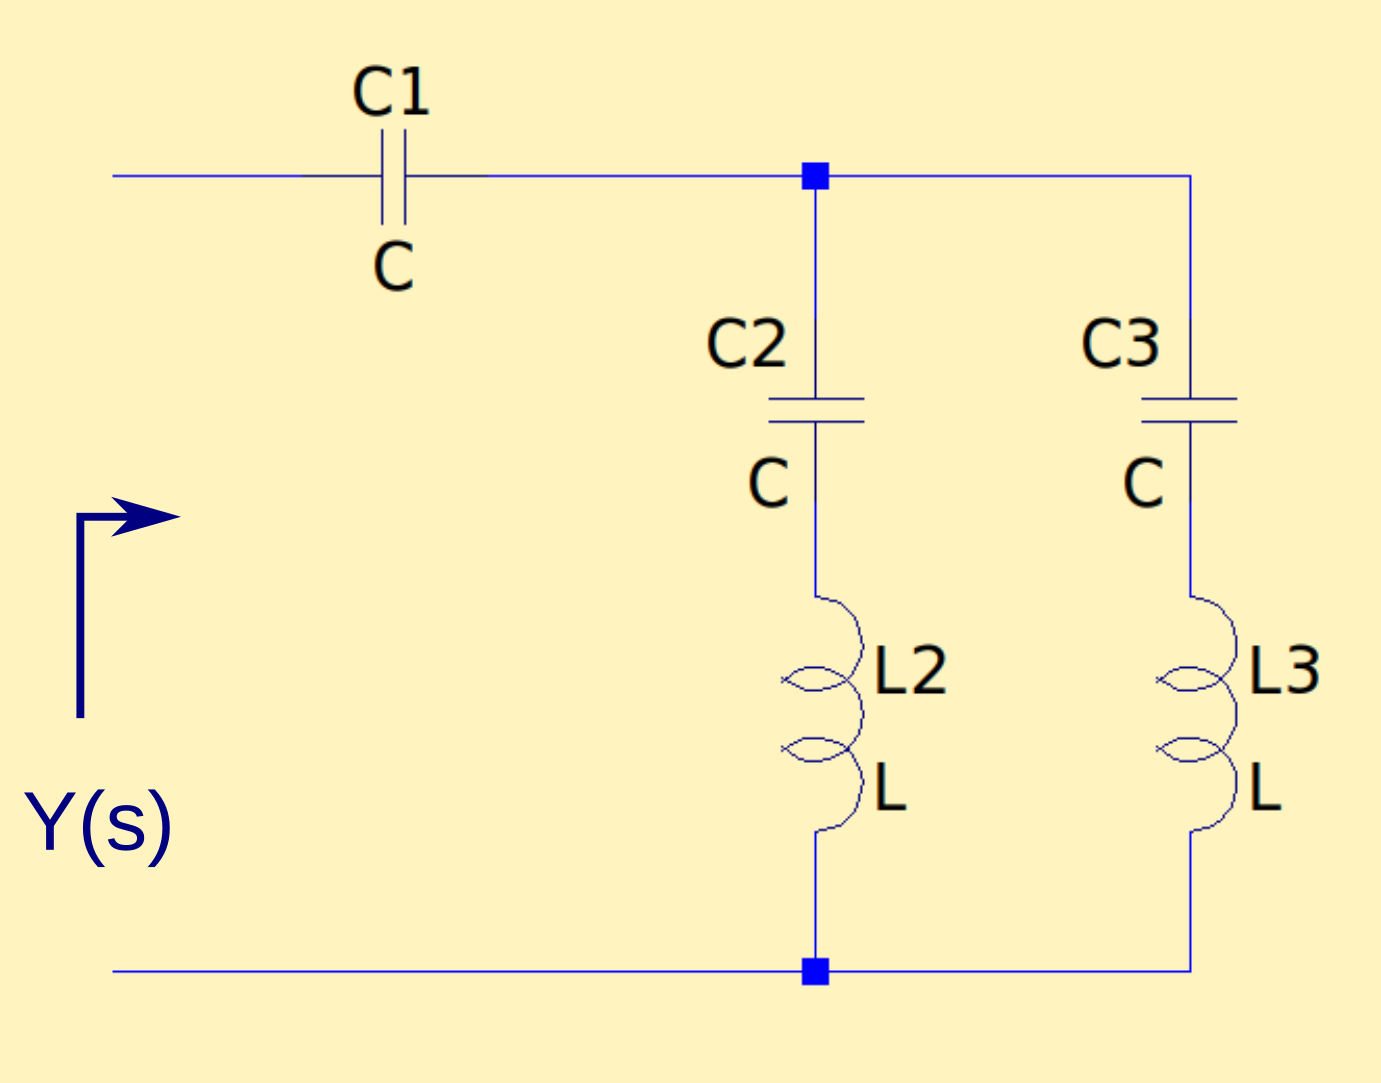</center>
</div>

Se desea calcular los valores de la red si $L_2$ y $C_2$ resuenan a 1 r/s.

### Resolución posible

Se comienza importando los módulos necesarios para la simulación

In [20]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie,  dibujar_tanque_derivacion,  dibujar_espacio_derivacion, Capacitor
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown


luego se procede a analizar la admitancia de entrada y las posibilidades para la síntesis de la red pedida

In [21]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
YY = 3*s*(s**2+sp.Rational(7,3))/(s**2+2)/(s**2+5)

print_subtitle('Admitancia de entrada a la red')

print_latex(a_equal_b_latex_s('Y(s)', YY))


#### Admitancia de entrada a la red

<IPython.core.display.Math object>

In [22]:
# calculamos polos y ceros de Y(s)
num, den = YY.as_numer_denom()

roots_num = sp.solve(num, s, dict=True)
print(roots_num)

roots_den = sp.solve(den, s, dict=True)
print(roots_den)

[{s: 0}, {s: -sqrt(21)*I/3}, {s: sqrt(21)*I/3}]
[{s: -sqrt(2)*I}, {s: sqrt(2)*I}, {s: -sqrt(5)*I}, {s: sqrt(5)*I}]


a continuación se hace un diagrama de polos y ceros de $Y(s)$, y se esquematiza una posible solución para forzar que L2 y C2 resuenen a 1 r/s, justamente mediante una remoción parcial del residuo en 0 Hz.

<div>
<center>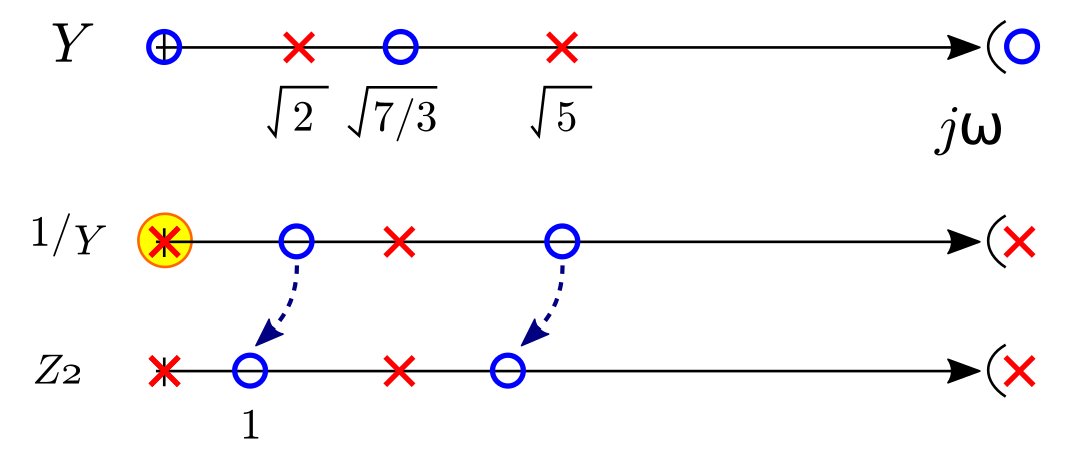</center>
</div>



In [23]:
# Restricción circuital: L2*C2 = 1 r/s
# remoción parcial en DC de 1/YY

omega_L2C2 = 1

Z2, Zc1 = remover_polo_dc(1/YY, omega_zero = omega_L2C2 )

# Yc1 es la admitancia removida
# extraigo C1
C1 = 1/(s*Zc1)

print_latex(a_equal_b_latex_s('Z_1(s) = \\frac{k^p_0}{s}', Zc1))
print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observa cómo se logra el efecto deseado: que $Z_2$ **tenga un cero en 1 r/s**. Luego se procede a remover el tanque L2 - C2 de $\frac{1}{Z_2}$

In [24]:

Y4, Yt2, L2, C2 = remover_polo_jw(1/Z2, isImpedance = False, omega = omega_L2C2 )

print_latex(a_equal_b_latex_s('Y_3(s)', Yt2))
print_latex(a_equal_b_latex_s('Y_4(s)', Y4))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Se observa finalmente que al remover el tanque L2-C2, es decir $Y_3(s)$, solo resta a la red $Y_4(s)$ para concluir la síntesis.

In [25]:
# quedaría solo un tanque en Y4, no especifico omega.
Y6, Yt3, L3, C3 = remover_polo_jw(Y4, isImpedance = False)

print_latex(a_equal_b_latex_s('Y_5(s)', Yt3))
print_latex(a_equal_b_latex_s('Y_6(s)', Y6))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Continuando de forma sistemática, removemos el tanque $Y_5(s)$ de $Y_4(s)$, resultando una admitancia remanente $Y_6(s)$. Como se observa, $Y_5(s)$ no es otra cosa más que $Y_4(s)$, como lo habíamos anticipado, e $Y_6(s)$ es una **admitancia nula que nos indica que la síntesis ha finalizado satisfactoriamente**.

Finalmente se dibuja la red hallada con los valores de componentes.

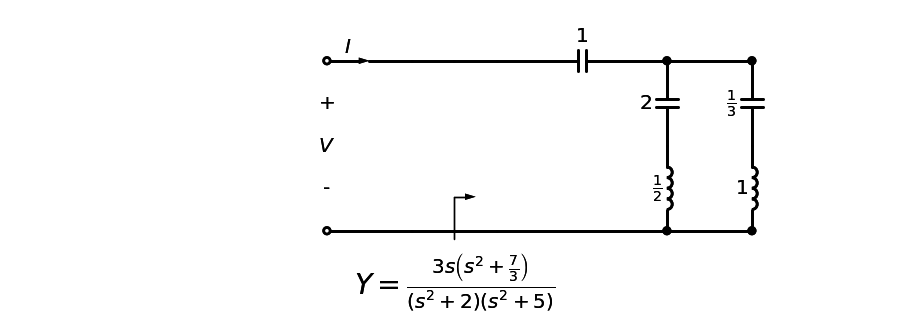

In [26]:
# Dibujamos la red resultante:

d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Y',  
                 YY, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Capacitor, C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_derivacion(d, L3, C3)

display(d)

Con esto se concluye el primer ejemplo.

### Ejemplo 2: Red disipativa

Sea la admitancia de entrada 

$$ Y(s) = \frac{3s(s^2+ \frac{7}{3})}{(s^2+2)(s^2+5)} $$

de la siguiente red 

<div>
<center>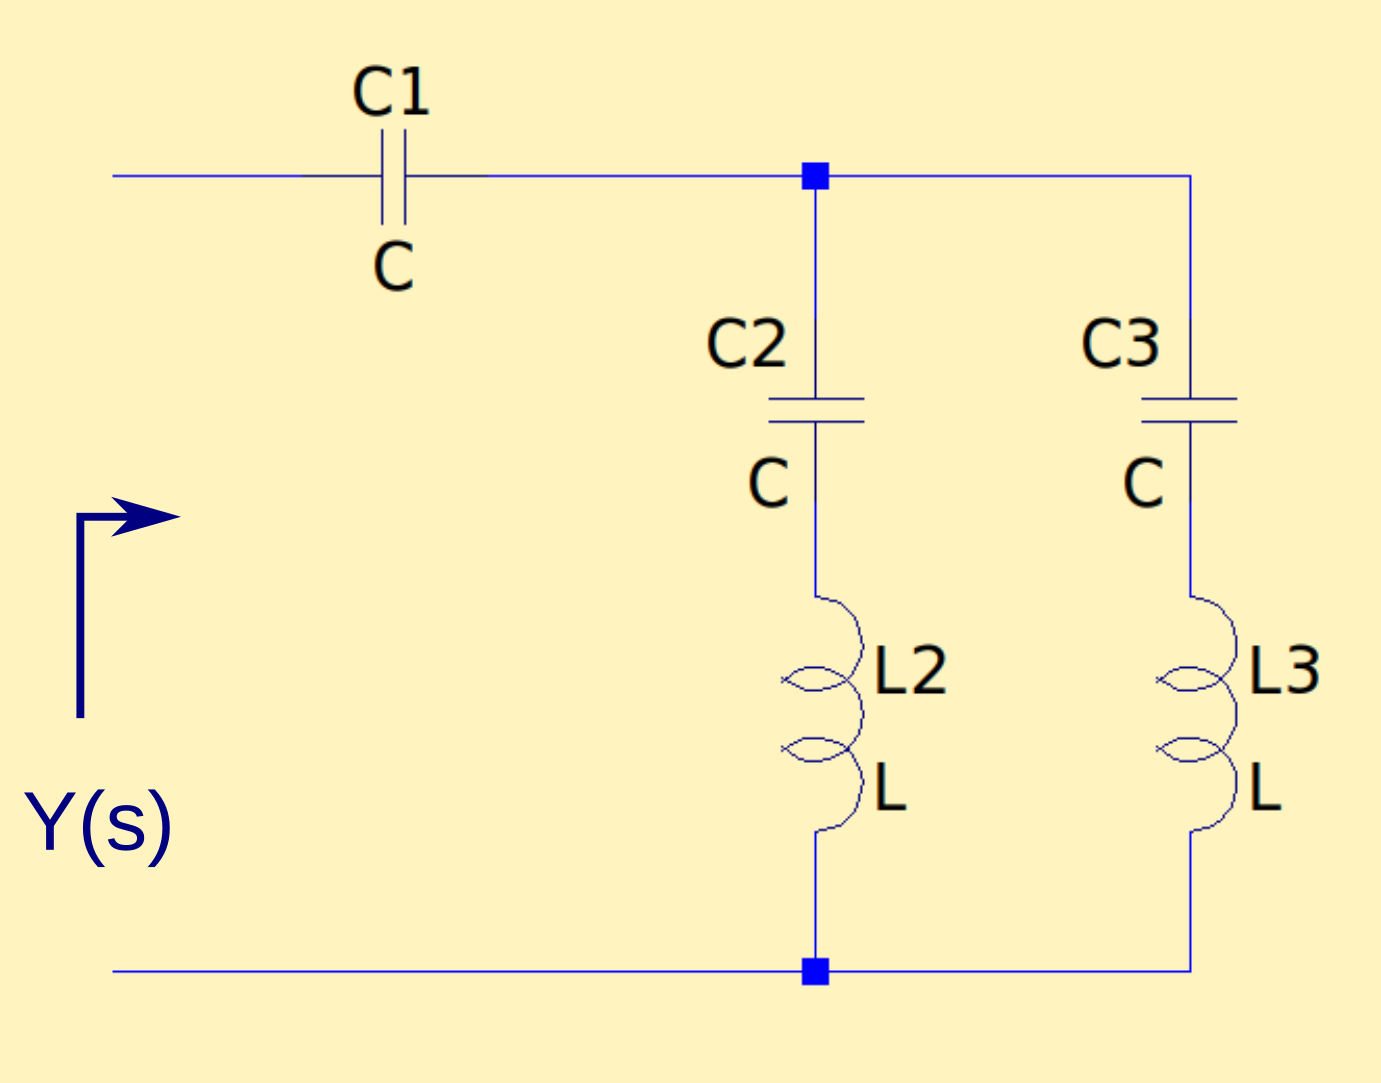</center>
</div>

Se desea calcular los valores de la red si $L_2$ y $C_2$ resuenan a 1 r/s.